In [50]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np

In [4]:
def plot_complex(ax, points, *args, **kwargs):
    ax.plot(np.real(points), np.imag(points), *args, **kwargs)

x0 = 0.300000


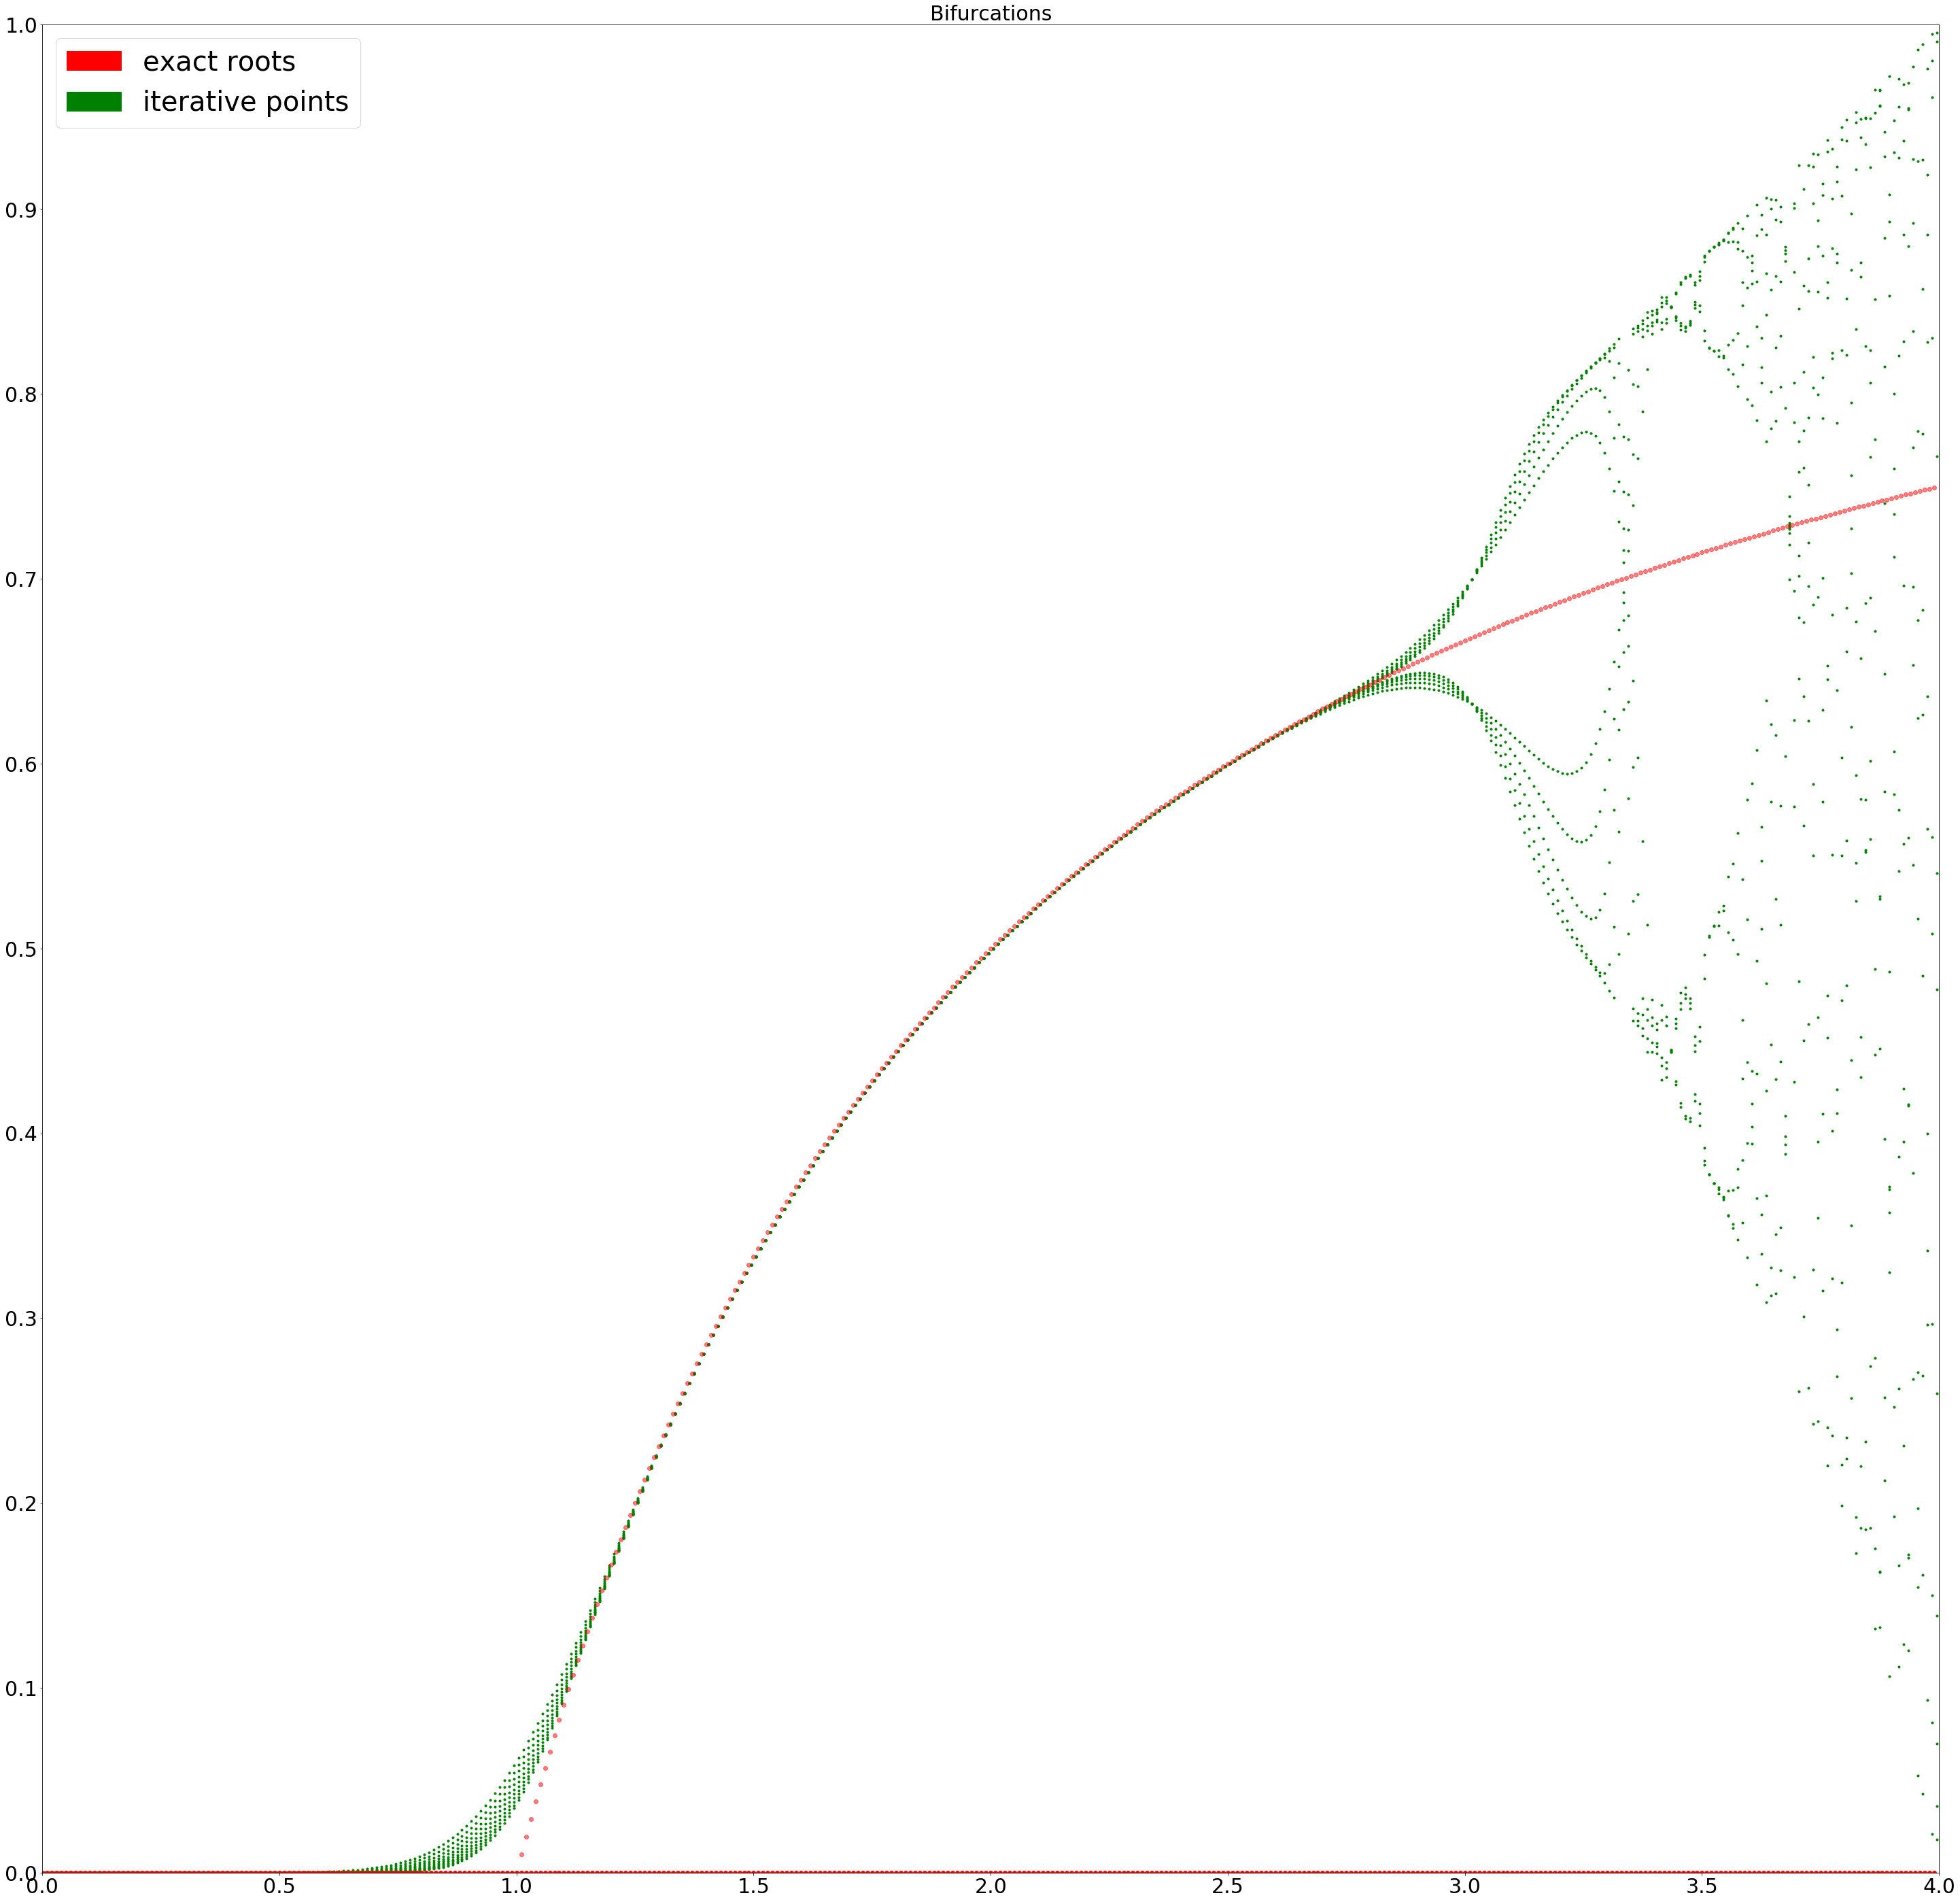

In [58]:
def simple_iteration_solve(f, x0, maxiter = 100):
    result = []
    for i in range(maxiter):
        x0 = f(x0)
        result.append(x0)
    return np.array(result)

def plot_bifurcation(f, x0 = 0.5, figsize=(50, 50), left = 0, right = 4, step = 0.01):
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_xlim([left, right])
    
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 1.01, 0.1))
    plt.tick_params(labelsize=30)
    
    red_patch = mpatches.Patch(color='red', label='exact roots')
    green_patch = mpatches.Patch(color='green', label='iterative points')
    plt.legend(handles=[red_patch, green_patch], prop={'size':40})
    plt.title("Bifurcations", size=30)
    
    x0 = x0
    print("x0 = %f" % x0)
    
    maxiter = 20
    for r in np.arange(left, right, step):
        points = simple_iteration_solve(lambda x: f(r, x), x0, maxiter)[-maxiter//2:]
#         print("r=%f, roots=(0, %f), val=%f" % (r, 1 - 1 / r, points[-1]))

        ax.plot(r, 0, color='red', marker = 'o')
        if (r >= 0.5):
            ax.plot(r, (1-1/r), color='red', alpha=0.5, marker = 'o')
            
        ax.scatter(np.full(points.size, r + step * 0.5), points, color = 'green', marker = '.')
#         fig.savefig("bifurcation.png")
plot_bifurcation(lambda r, x: r * x * (1-x), x0 = 0.3, figsize=(50, 50))


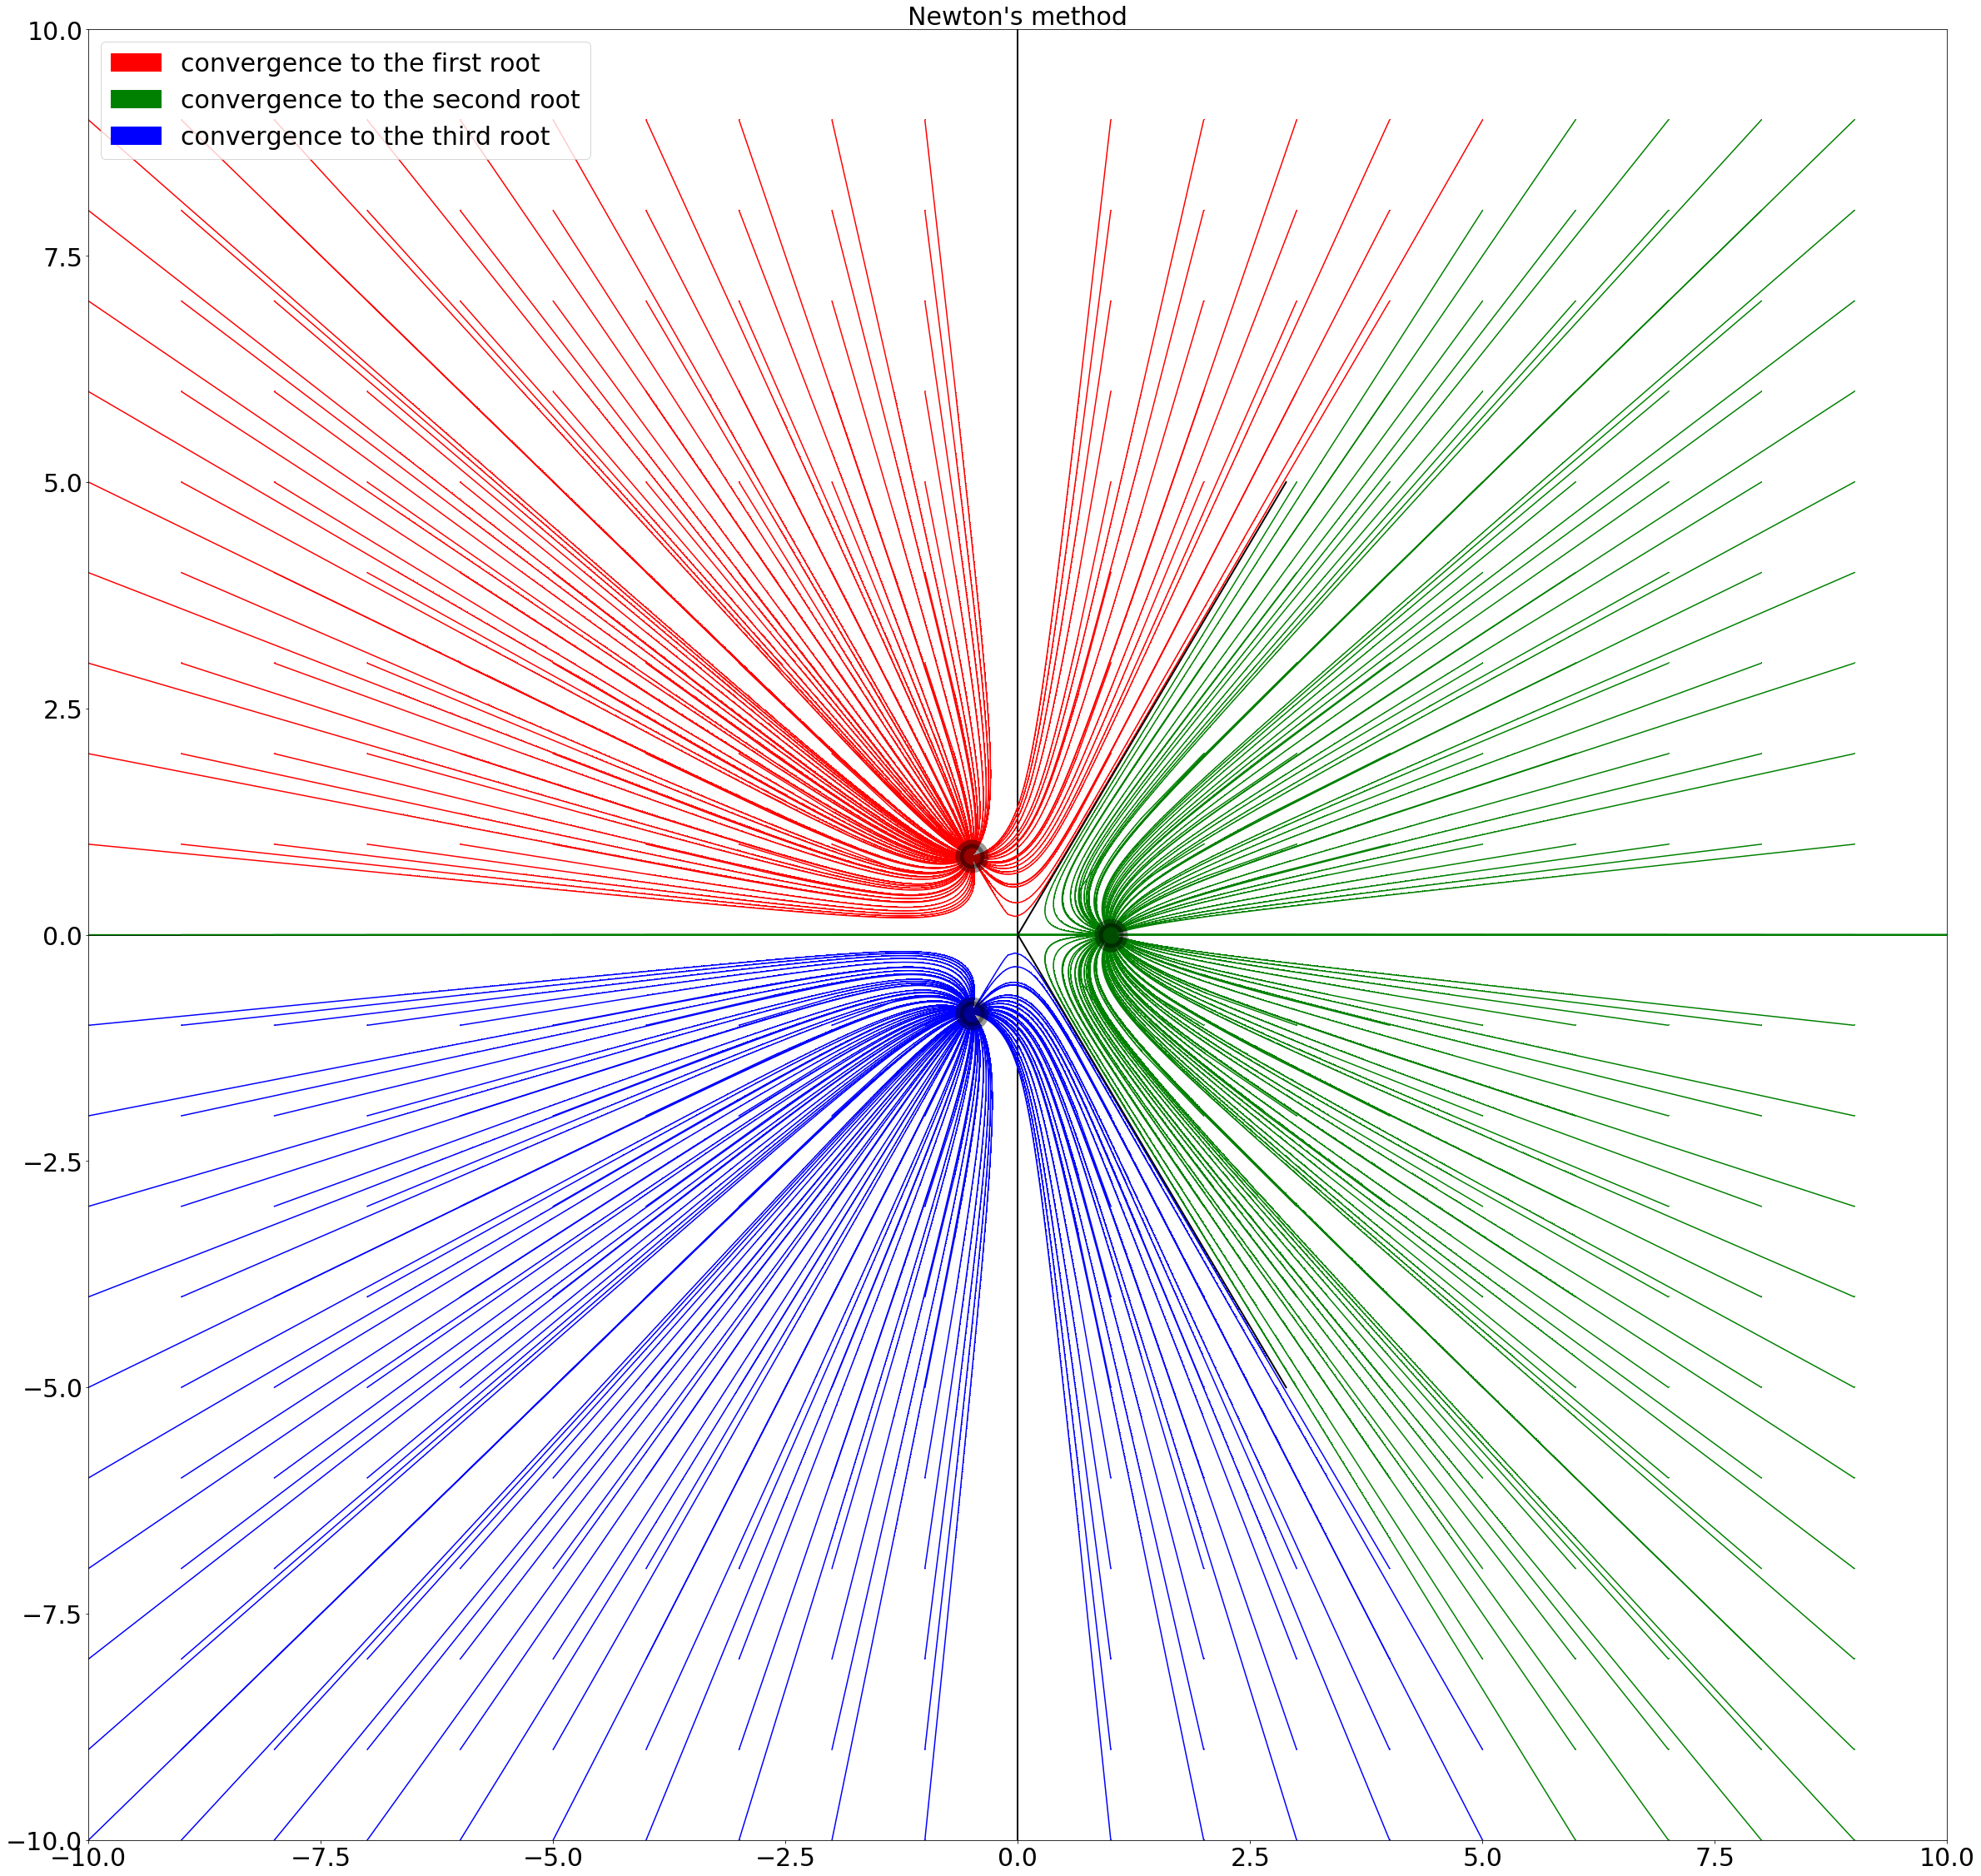

In [60]:
def f(z): return z ** 3 - 1
def df(z): return 3 * (z ** 2)
def newton_solve(f, df, z0, tol, alpha=0.01):
    z1 = z0 - f(z0) / df(z0)
    result = [z0, z1]
    while (len(result) < 1e4) or (np.absolute(result[-1] - result[-2]) > tol):
        z_last = result[-1]
        result.append(z_last - alpha * f(z_last) / df(z_last))
    return np.array(result)

def plot_graph():
    fig, ax = plt.subplots(figsize=(40, 40))
    left, right = -10, 10
    ax.set_xlim([left, right])
    ax.set_ylim([left, right])

    plt.tick_params(labelsize=30)

    red_patch = mpatches.Patch(color='red', label='convergence to the first root')
    green_patch = mpatches.Patch(color='green', label='convergence to the second root')
    blue_patch = mpatches.Patch(color='blue', label='convergence to the third root')
    plt.legend(handles=[red_patch, green_patch, blue_patch], prop={'size':30}, loc=2)
    plt.title("Newton's method", size=30)

    ax.axhline(y=0, color='black', linewidth=2)
    ax.axvline(x=0, color='black', linewidth=2)
    
    exact_roots = [1+0*1j, 
                   -0.5-np.sqrt(3)*0.5*1j, 
                   -0.5+np.sqrt(3)*0.5*1j]
    root_colors = ['green', 'blue', 'red']
    
    def get_root_color(z):
        for i in range(3):
            if (np.absolute(z-exact_roots[i]) < 1e-2):
                return root_colors[i]
        return 'black'

    for x in np.arange(left, right, 1.0):
        for y in np.arange(left, right, 1.0):
            z0 = x + y * 1j
            if (np.absolute(x) > 0):
                pnts = newton_solve(f, df, z0, 1e-2)
                color = get_root_color(pnts[-1])
                plot_complex(ax, pnts, color = color, marker=',')
                
    for i in range(3):
        plot_complex(ax, exact_roots[i], color='black', marker='o', alpha=0.4, markersize=30, markeredgewidth=10)
        
    ax.plot([right / np.sqrt(3), 0, 5 / np.sqrt(3)], [-5, 0, 5], color='black', linewidth=2.0)

plot_graph()